<h2 align="center">EDA_Details</h2>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sn

pd.set_option('display.max_columns', None)

In [19]:
features = ['expired_age', 'sex', 'PMI', 'sn_depigmentation', 'Braak score', 'TangleTotal', 'Plaque density', 
            'PlaqueTotal', 'CONDITION', 'BIOFLUID']

In [20]:
sra = pd.read_csv('../test/testdata/SraRunTable.csv',usecols=features)
sra.head()

,CONDITION,BIOFLUID,expired_age,PMI,PlaqueTotal,Plaque density,TangleTotal,Braak score,sn_depigmentation,sex
0,Healthy Control,Cerebrospinal fluid,94,2.50,15.00,frequent,12.00,IV,none,male
1,Parkinson's Disease,Serum,79,6.00,2.75,sparse,3.25,II,severe,female
2,Alzheimer's Disease,Serum,81,2.50,11.50,frequent,11.10,V,mild,female
3,Parkinson's Disease,Cerebrospinal fluid,79,2.50,7.50,moderate,3.00,II,severe,male
4,Parkinson's Disease,Cerebrospinal fluid,82,4.16,0.00,zero,6.50,III,severe,female


Text(0.5, 1.0, "Substantia Nigra Depigmentation Score Distribution of Healthy, Alzheimer's, and Parkinson's samples")

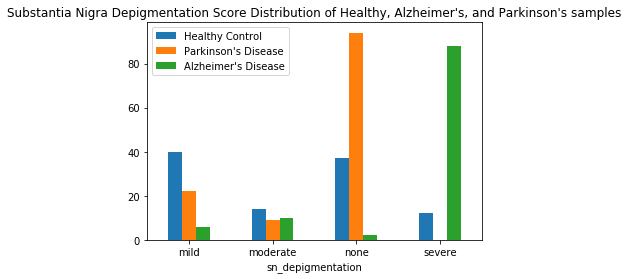

In [153]:
conditions = sra.CONDITION.unique()
sn_dp = sra.groupby(['sn_depigmentation', 'CONDITION']).size().to_frame()
sn_dp.unstack().plot(kind='bar')
plt.legend(conditions)
plt.xticks(rotation = 0)
plt.title('Substantia Nigra Depigmentation Score Distribution of Healthy, Alzheimer\'s, and Parkinson\'s samples')

In [146]:
# redundant features?
# boxplot?
pd.DataFrame(group.describe().rename(columns={'PlaqueTotal':name}).squeeze()  for name, group in sra[['Plaque density', 'PlaqueTotal']].groupby('Plaque density'))


,count,mean,std,min,25%,50%,75%,max
frequent,115.0,13.227217,1.813332,6.50,12.915,13.50,14.875,15.00
moderate,95.0,9.539579,2.865883,1.75,7.250,9.75,11.500,14.25
sparse,47.0,5.507447,3.395009,0.50,2.475,5.30,7.500,12.00
zero,86.0,0.462209,1.685805,0.00,0.000,0.00,0.000,12.75


Text(0.5, 1.0, 'Braak Score Distribution of Each Condition')

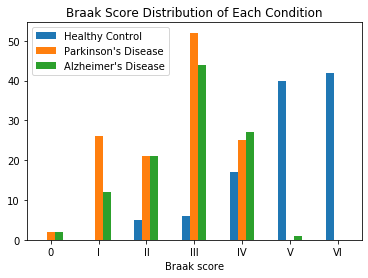

In [152]:
#braak distribution
conditions = sra.CONDITION.unique()
bs_cnts = sra.groupby(['Braak score','CONDITION']).size().to_frame()
bs_cnts.unstack().plot(kind='bar')
plt.legend(conditions)
plt.xticks(rotation = 0)
plt.title('Braak Score Distribution of Healthy, Alzheimer\'s, and Parkinson\'s samples')

/Users/xuanyuwu/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xuanyuwu/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


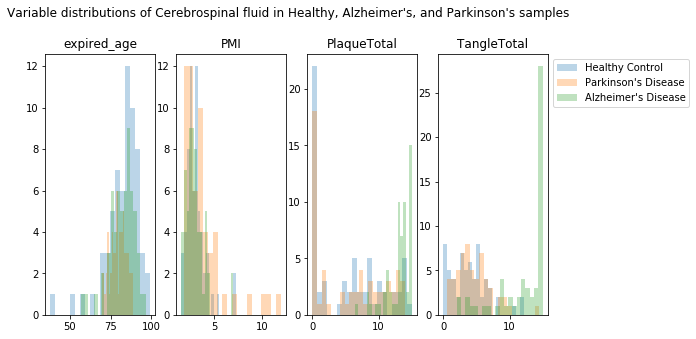

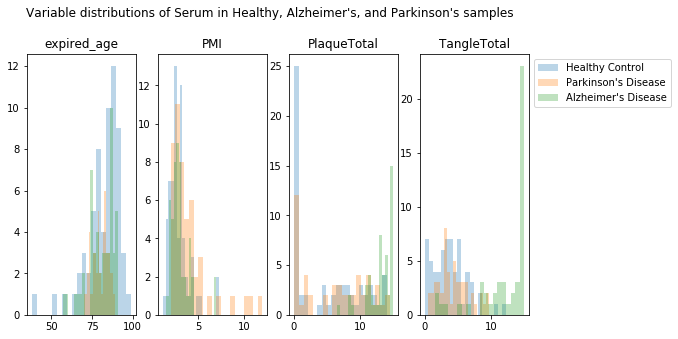

In [49]:
# numerical variables distribution
conditions = sra.CONDITION.unique()
biofluids = sra.BIOFLUID.unique()
num_bins = 20
variables = ['expired_age', 'PMI', 'PlaqueTotal', 'TangleTotal']
for i in biofluids:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    fig.set_figheight(5)
    fig.set_figwidth(9)
    ax_arr = [ax1, ax2, ax3, ax4]
    fig.suptitle('Variable distributions of %s in Healthy, Alzheimer\'s, and Parkinson\'s samples' % i)
    fig.subplots_adjust(top=0.85)
    for j in conditions:
        for k in range(len(variables)):
            data = sra.loc[(sra['CONDITION']==j) & (sra['BIOFLUID']==i)][variables[k]]
            ax = ax_arr[k]
            ax.hist(data, bins=num_bins,label=j, alpha = 0.3)
            ax.set_title(variables[k])
        ax.legend(bbox_to_anchor=(1, 1))
            
            

Braak staging refers to two methods used to classify the degree of pathology in Parkinson's disease and Alzheimer's disease. These methods are used both in research and for the clinical diagnosis of these diseases and are obtained by performing an autopsy of the brain.

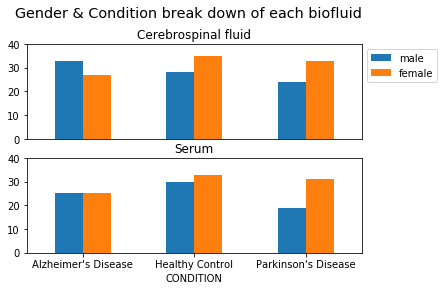

In [21]:
#sample break-down
cnt_summary_CSF = sra[sra['BIOFLUID']=='Cerebrospinal fluid'][['CONDITION', 'BIOFLUID', 'sex']].groupby(['CONDITION', 'sex']).count().unstack()
cnt_summary_serum = sra[sra['BIOFLUID']=='Serum'][['CONDITION', 'BIOFLUID', 'sex']].groupby(['CONDITION', 'sex']).count().unstack()
fig, (ax1, ax2) = plt.subplots(2, 1)
cnt_summary_CSF.plot.bar(ax = ax1)
ax1.legend(['male', 'female'], bbox_to_anchor=(1, 1))
ax1.set_title('Cerebrospinal fluid')
ax1.set_ylim(0,40)
ax1.xaxis.set_visible(False)

cnt_summary_serum.plot.bar(ax = ax2)
ax2.set_title('Serum')
ax2.legend().remove()
ax2.set_ylim(0,40)
plt.xticks(rotation = 0)

fig.suptitle('Gender & Condition break down of each biofluid', fontsize='x-large')
fig.subplots_adjust(top=0.85)